# Classification of Music by Genre

Classification of music by genre.

First, some imports...

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import pandas as pd

Set up dataset

In [130]:
music = pd.read_csv("music.csv")
X = music[["Popularity", "danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "liveness", "valence", "tempo", "time_signature"]]
y = music["Class"]

#y.transform({5:0, 6:1, 8:2, 9:3, 10:4}, axis=1)
# Rename classes 5,6,8,9,10 to 0,1,2,3,4
#new_classes = {5:0, 6:1, 8:2, 9:3, 10:4}
#y = [new_classes[yn] for yn in y[1:]]


X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X.shape)
print(y.shape)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

(12406, 11)
(12406,)
      Popularity  danceability  energy  loudness  mode  speechiness  \
9049        50.0         0.545   0.998    -3.645     1       0.2340   
51          56.0         0.704   0.803    -4.770     1       0.3510   
8771        40.0         0.590   0.780    -7.832     1       0.0304   
9124         1.0         0.717   0.732    -4.985     1       0.0426   
9147        49.0         0.403   0.763    -6.727     1       0.1180   

      acousticness  liveness  valence    tempo  time_signature  
9049        0.0192     0.877    0.142  129.992               4  
51          0.1650     0.540    0.529  124.087               4  
8771        0.2330     0.129    0.581  133.086               4  
9124        0.0394     0.136    0.708  119.996               4  
9147        0.0277     0.148    0.455   82.812               4  
       Popularity  danceability  energy  loudness  mode  speechiness  \
6337         50.0         0.598   0.455    -7.951     0       0.0475   
2754         42.0 

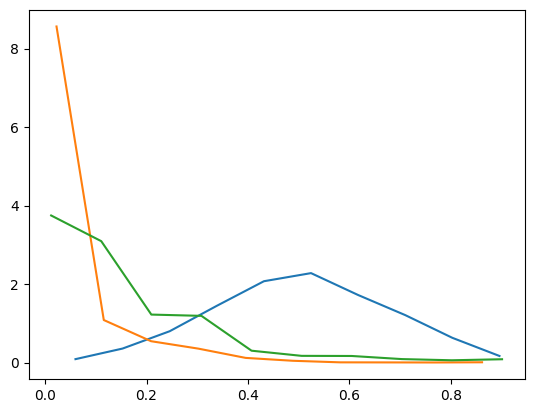

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

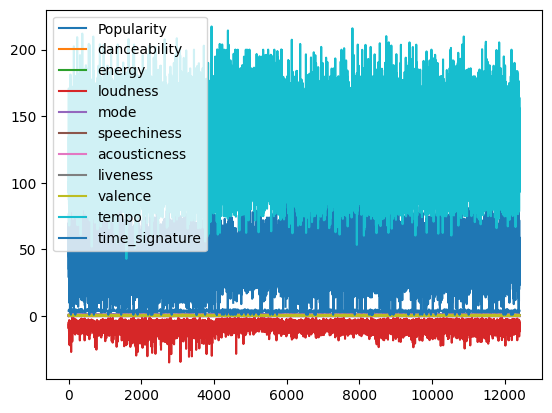

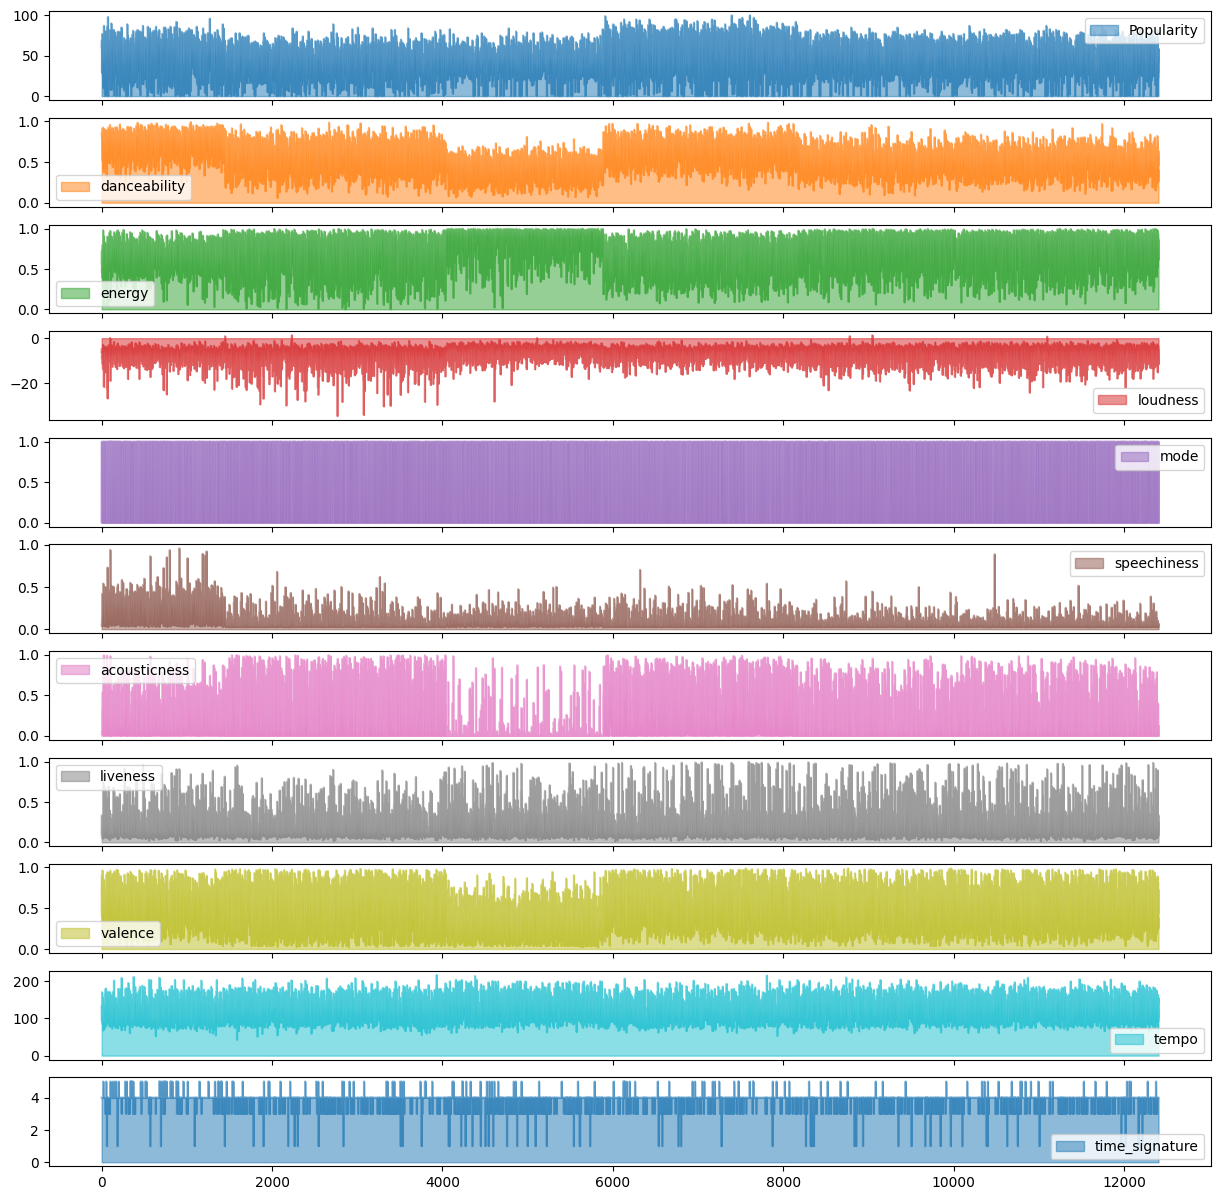

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
#for col in X.columns:
#    print(col)
#    hist = np.histogram(music[[col]], density=True)
#    plt.plot(hist[1][:-1], hist[0])
#    plt.show()
    
#dance_norm_hist = np.histogram(music[["Popularity"]], density=True)
dance_norm_hist = np.histogram(music[["danceability"]], density=True)
energy_norm_hist = np.histogram(music[["energy"]], density=True)
loudness_norm_hist = np.histogram(music[["loudness"]], density=True)
mode_norm_hist = np.histogram(music[["mode"]], density=True)
speechiness_norm_hist = np.histogram(music[["speechiness"]], density=True)

acousticness_norm_hist = np.histogram(music[["acousticness"]], density=True)
liveness_norm_hist = np.histogram(music[["liveness"]], density=True)
valence_norm_hist = np.histogram(music[["valence"]], density=True)
tempo_norm_hist = np.histogram(music[["tempo"]], density=True)
time_signature_norm_hist = np.histogram(music[["time_signature"]], density=True)
plt.plot(dance_norm_hist[1][:-1], dance_norm_hist[0])
#plt.plot(energy_norm_hist[1][:-1], energy_norm_hist[0])
#plt.plot(loudness_norm_hist[1][:-1], loudness_norm_hist[0])
#plt.plot(mode_norm_hist[1][:-1], mode_norm_hist[0])
plt.plot(speechiness_norm_hist[1][:-1], speechiness_norm_hist[0])
#plt.plot(acousticness_norm_hist[1][:-1], acousticness_norm_hist[0])
plt.plot(liveness_norm_hist[1][:-1], liveness_norm_hist[0])
#plt.plot(valence_norm_hist[1][:-1], valence_norm_hist[0])
#plt.plot(tempo_norm_hist[1][:-1], tempo_norm_hist[0])
#plt.plot(time_signature_norm_hist[1][:-1], time_signature_norm_hist[0])
plt.show()

X.plot()
X.plot.area(figsize=(15, 15), stacked=False, subplots=True)

['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']
(9304, 11)
(9304,)


ValueError: 'c' argument has 12406 elements, which is inconsistent with 'x' and 'y' with size 12183.

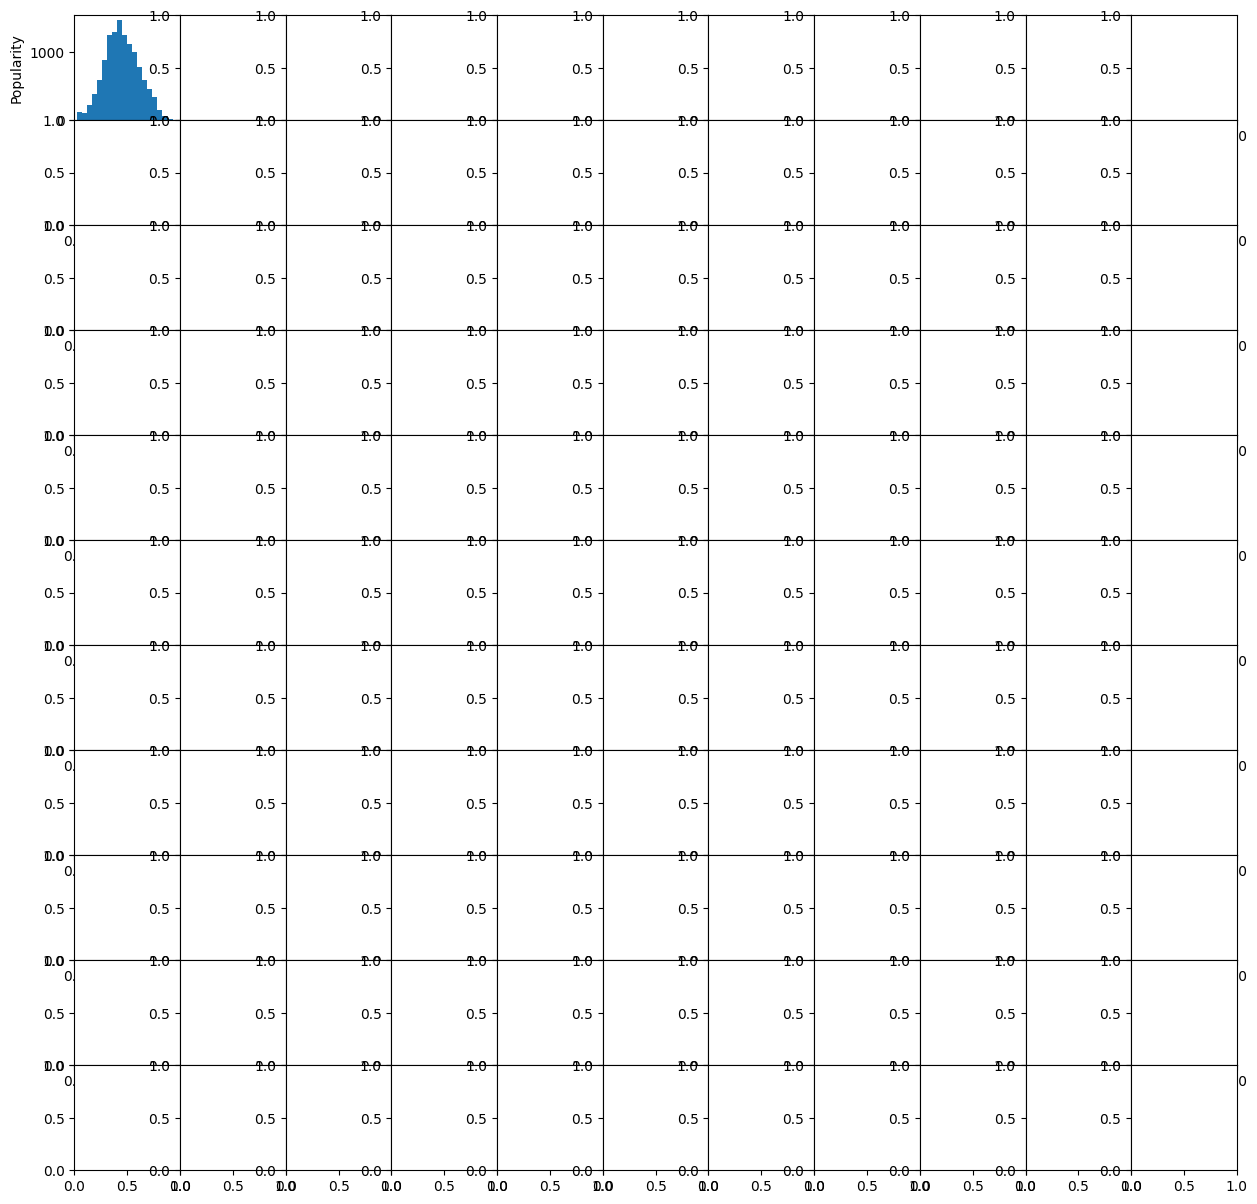

In [146]:
color_map = {5:'r', 6:'g', 8:'b', 9:'y', 10:'c'}
#y.apply(lambda yn : yn = color_map[y])
colors = [color_map[yn] for yn in music["Class"]]
print(colors[:10])
print(X_train.shape)
print(y_train.shape)
dataframe = pd.DataFrame(X_train, columns=[["Popularity", "danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "liveness", "valence", "tempo", "time_signature"]])
pd.plotting.scatter_matrix(music[["Popularity", "danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "liveness", "valence", "tempo", "time_signature"]], c=colors, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.2)
  